# Warm up

EXAMPLE1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
import SystemFunction

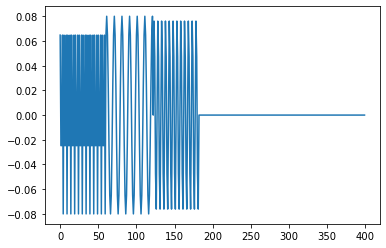

In [2]:
N = 400
M = 60
n = np.arange(0, M+1, 1)
wn = 0.54 - 0.46 * np.cos(2*np.pi*n)
x1 = wn * np.cos(0.2 * np.pi * n)
x2 = wn * np.cos(0.4 * np.pi * n - np.pi/2)
x3 = wn * np.cos(0.8 * np.pi * n - np.pi/5)
xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis = None)
plt.figure()
plt.plot(xn)

In [3]:
w = np.linspace(-np.pi, np.pi, N)
Xw = fft(xn)
Xw_shifted = np.fft.fftshift(Xw)

Text(0.5, 0, 'frequency x$\\pi$ rad/sample')

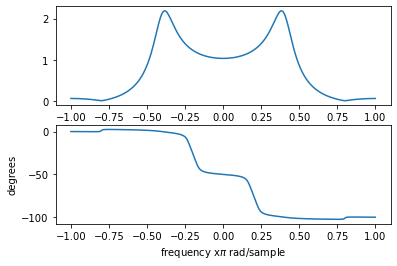

In [4]:
Hw, polezz, zerozz, K = SystemFunction.SystemFunction(w)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

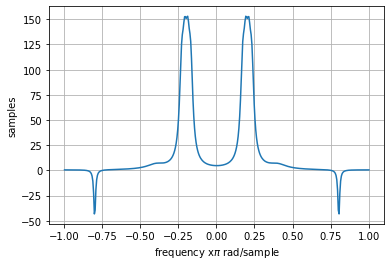

In [5]:
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

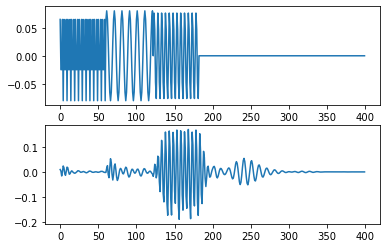

In [6]:
Yw_shifted = Hw * Xw_shifted
Yw = np.fft.ifftshift(Yw_shifted)
yn = np.real(ifft(Yw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(xn)
ax2.plot(yn)

EXAMPLE2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
%matplotlib notebook

<IPython.core.display.Javascript object>


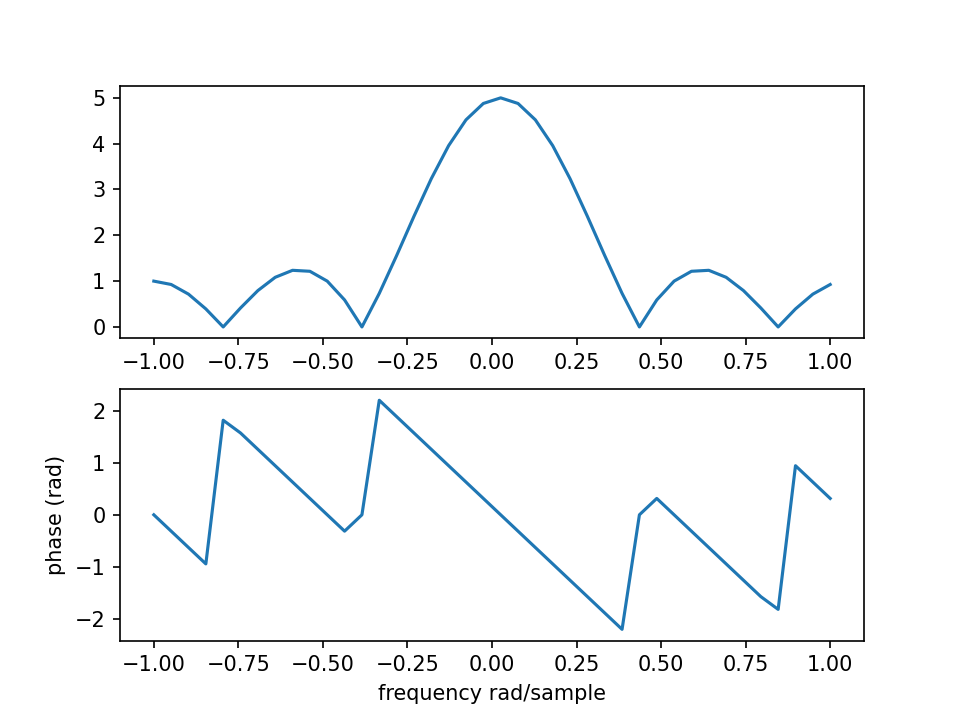

([<matplotlib.lines.Line2D at 0x1ecd4f141f0>],
 Text(0, 0.5, 'phase (rad)'),
 Text(0.5, 0, 'frequency rad/sample'))

In [8]:
N = 40
hn = np.ones(5)
Hw = np.fft.fftshift(fft(hn, N))
w = np.linspace(-np.pi, np.pi, N)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('phase (rad)'), plt.xlabel('frequency rad/sample')

<IPython.core.display.Javascript object>


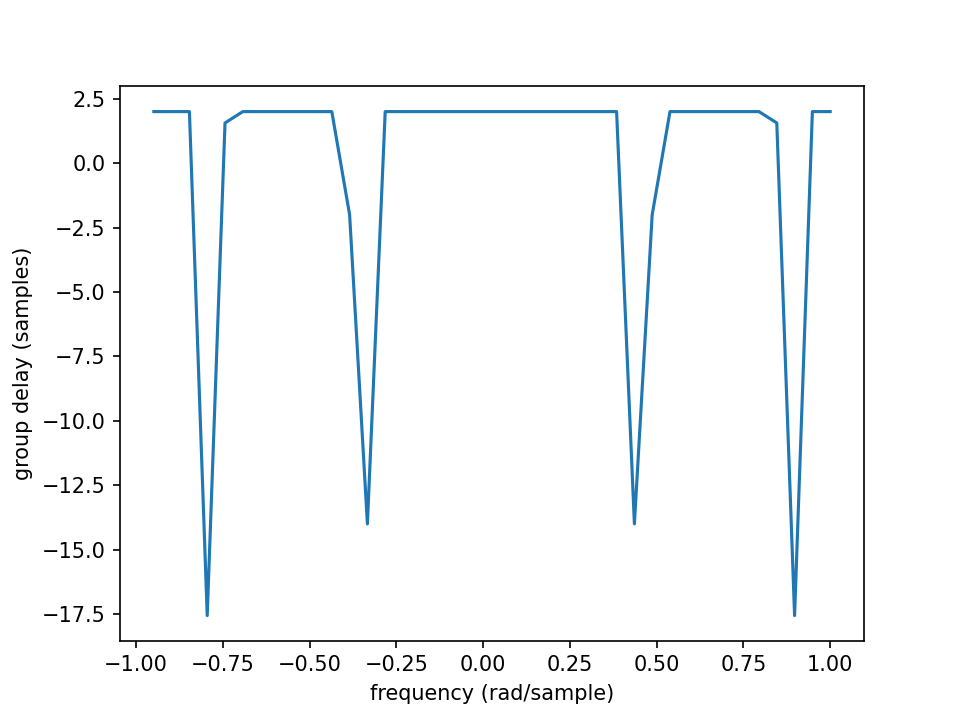

Text(0, 0.5, 'group delay (samples)')

In [9]:
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')

In [10]:
n = np.arange(0, N, 1)
w0 = 0.1 * np.pi
xn = np.cos(w0*n)
Xw = np.fft.fftshift(fft(xn,N))
Yw_shifted = Hw * Xw
Yw = np.fft.ifftshift(Yw_shifted)
yn = np.real(ifft(Yw))

<IPython.core.display.Javascript object>


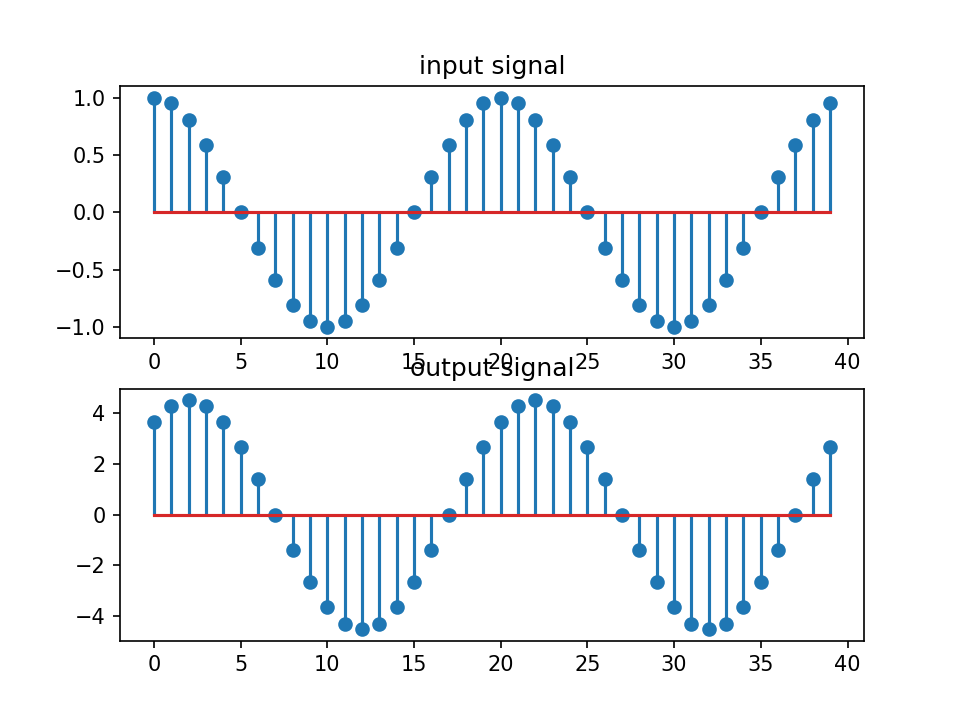

(<StemContainer object of 3 artists>, None)

In [11]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.stem(n, xn), ax1.title.set_text('input signal')
ax2.stem(n, yn), ax2.title.set_text('output signal')

EXAMPLE3

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
%matplotlib notebook
from scipy.io import loadmat

In [13]:
filter_data = loadmat('butterworth.mat')
Coeffs = filter_data['ba'].astype(np.float) #Get the coefficients and convert them to float(from string)
b = Coeffs[:, 0] #First column 
a = Coeffs[:, 1] #Second column (only if the filter is IIR)

<ipython-input-13-e1424707d097>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = filter_data['ba'].astype(np.float) #Get the coefficients and convert them to float(from string)


<IPython.core.display.Javascript object>


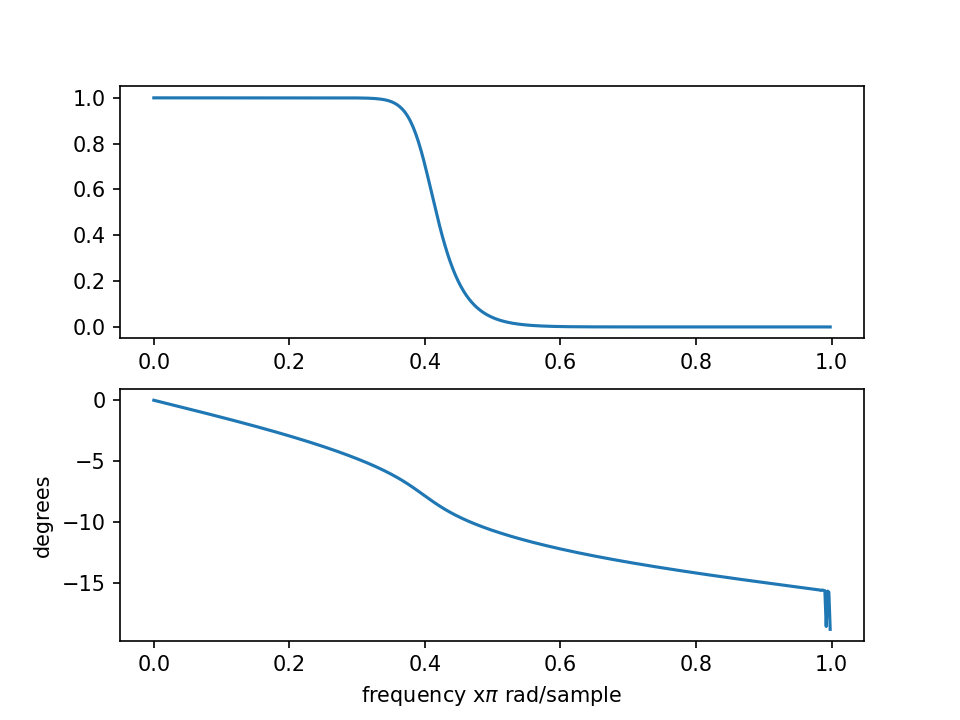

Text(0.5, 0, 'frequency x$\\pi$ rad/sample')

In [14]:
w, Hw = sgnl.freqz(b,a)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

<IPython.core.display.Javascript object>


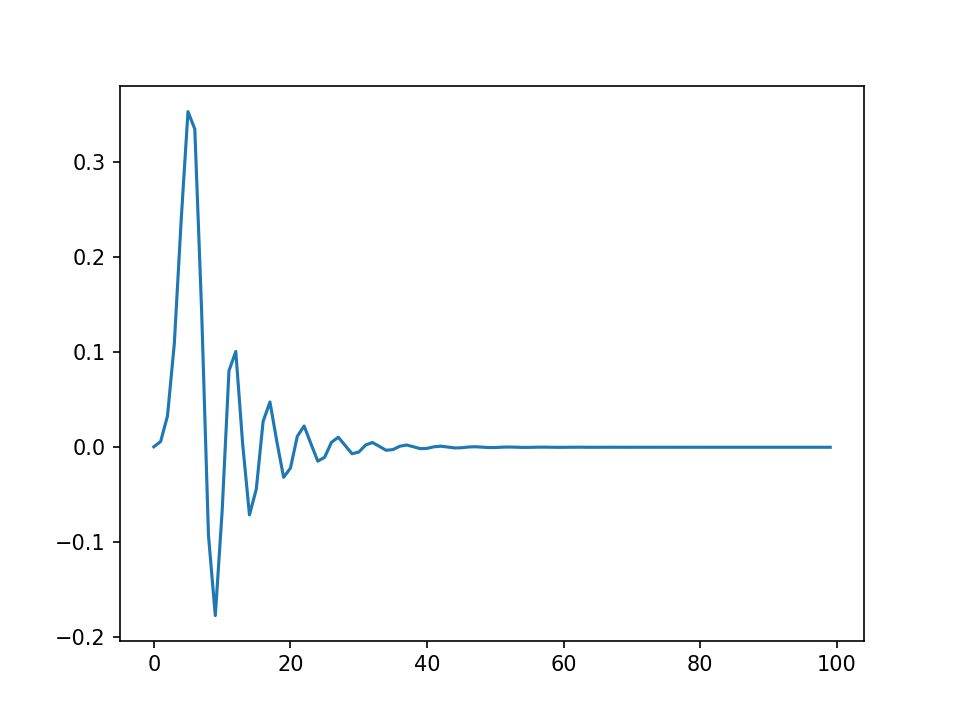

In [15]:
n, hn = sgnl.dimpulse((b,a,1), n=100) #Compute impulse response for 100 points
plt.figure()
plt.plot(n, np.squeeze(hn))

<IPython.core.display.Javascript object>


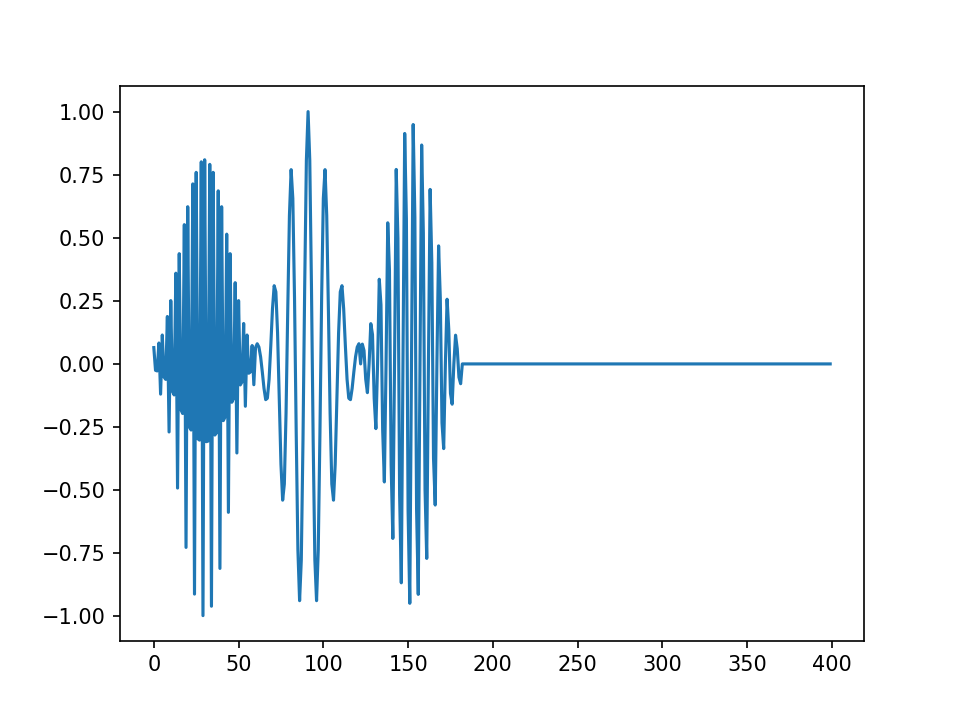

In [16]:
N = 400
M = 60 #Size of window function (and sample length of the frequency components)
n1 = np.arange(0, M+1, 1)
wn = 0.54 - 0.46 * np.cos(2*np.pi*n1/M) #(Hamming window)

x1 = wn*np.cos(0.2*np.pi*n1)
x2 = wn*np.cos(0.4*np.pi*n1-np.pi/2)
x3 = wn*np.cos(0.8*np.pi*n1-np.pi/5)

xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n1))), axis = None)
plt.figure()
plt.plot(xn)

<IPython.core.display.Javascript object>


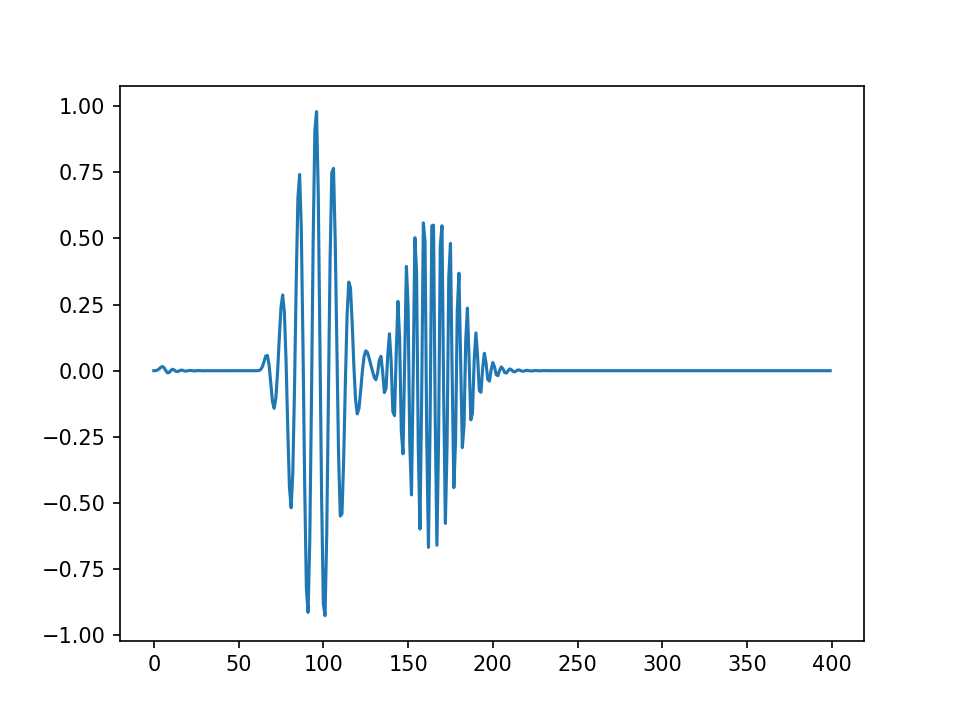

In [17]:
yn = sgnl.lfilter(b, a, xn)
plt.figure()
plt.plot(yn)

# Exercise

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
%matplotlib notebook

<IPython.core.display.Javascript object>


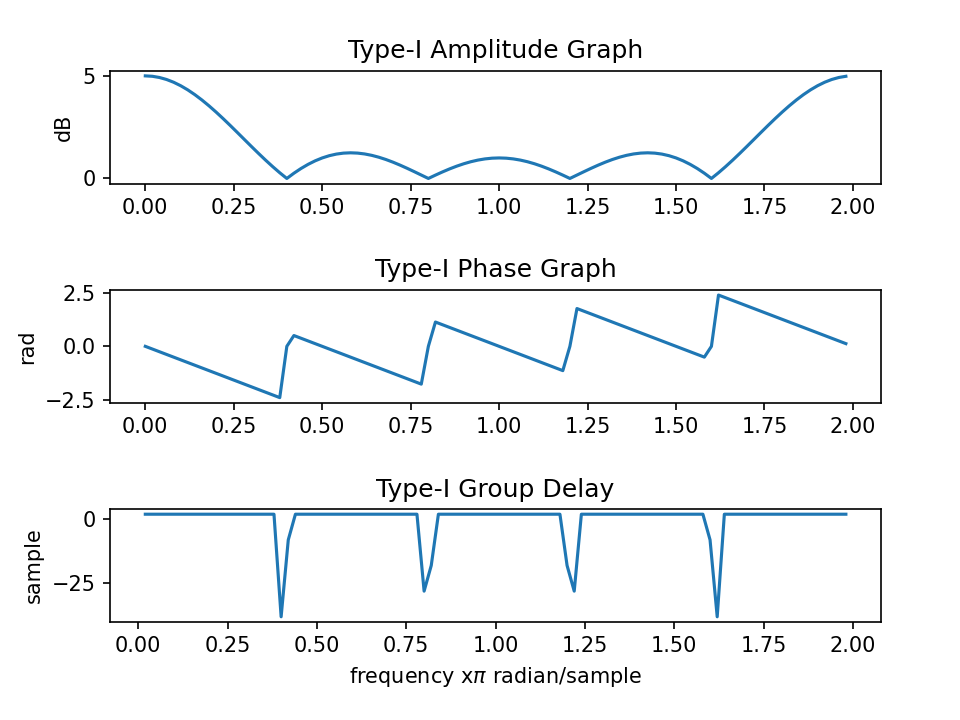

<IPython.core.display.Javascript object>


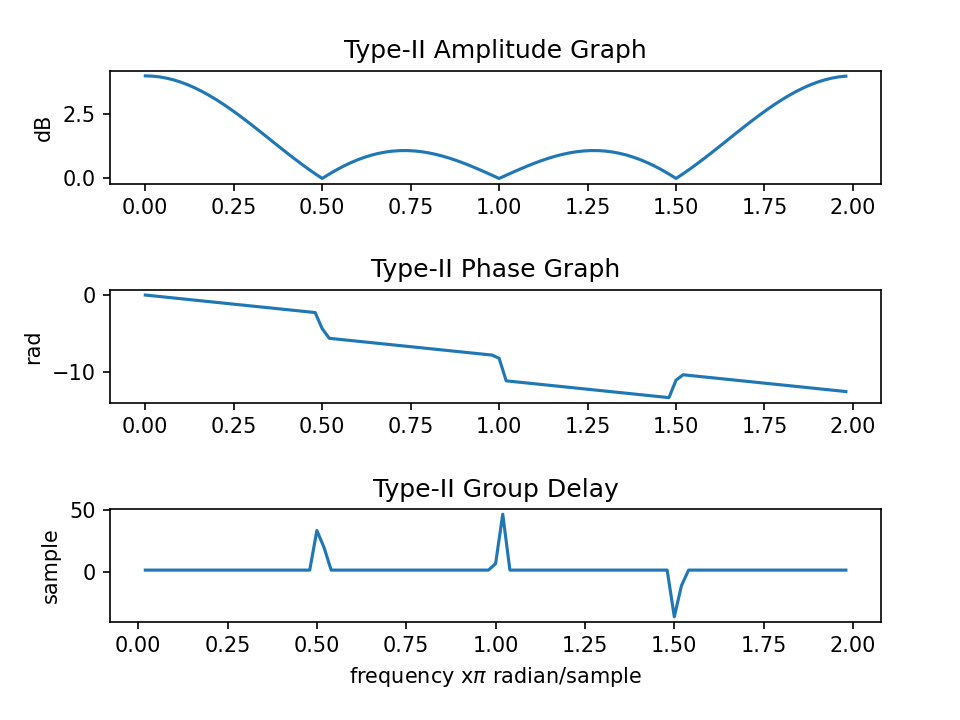

<IPython.core.display.Javascript object>


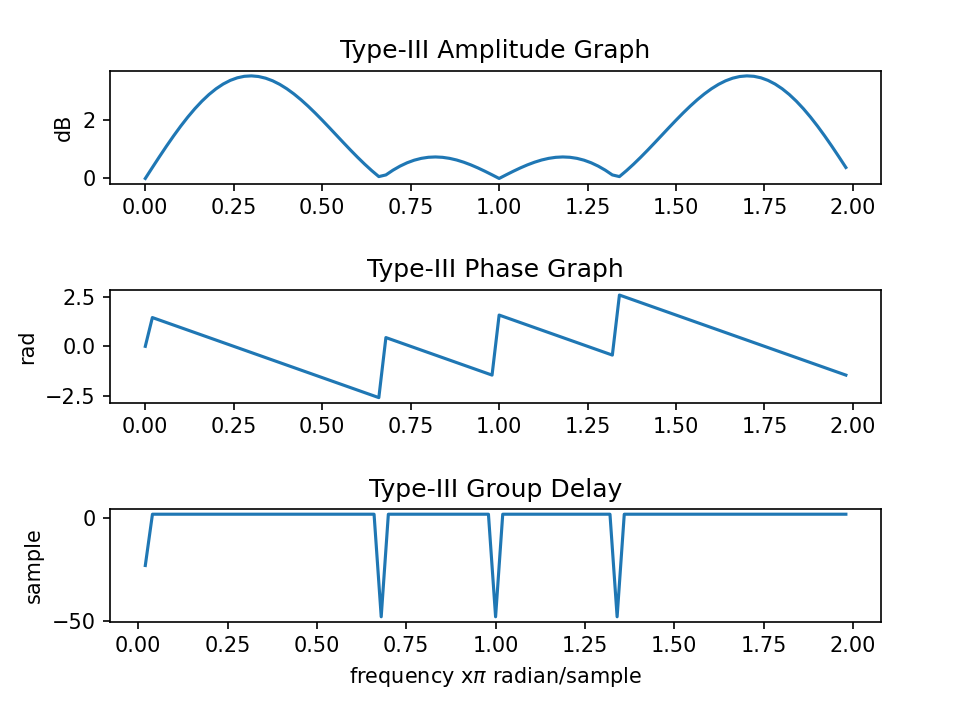

<IPython.core.display.Javascript object>


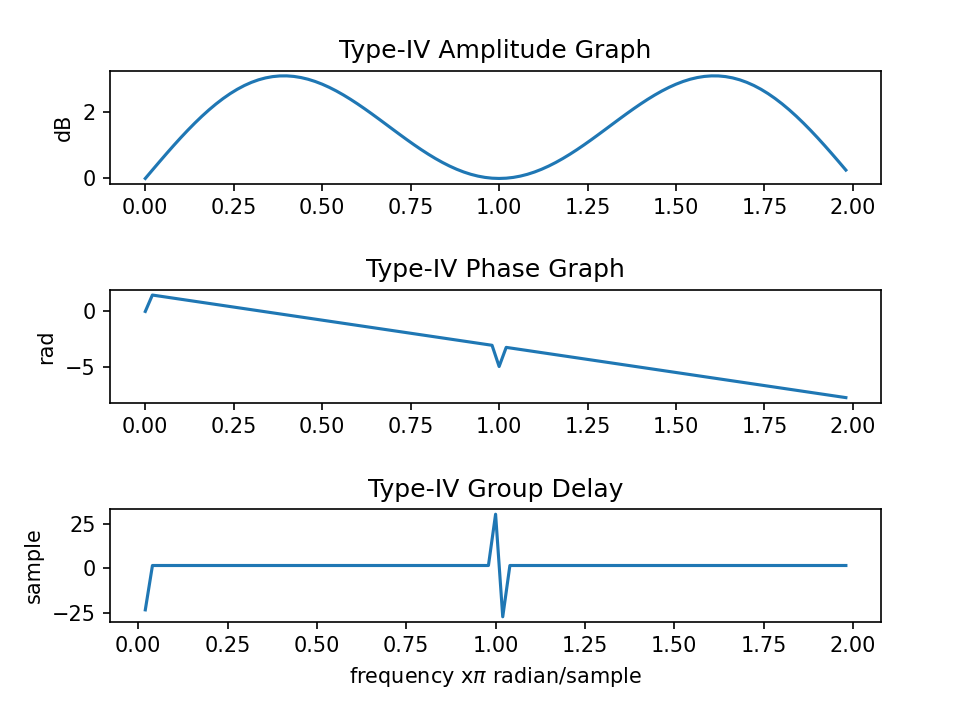

In [19]:
n_T1 = np.arange(0, 5, 1)
hn_T1 = np.array([1,1,1,1,1]) #Type-I

n_T2 = np.arange(0, 4, 1)
hn_T2 = np.array([1,1,1,1]) #Type-II

n_T3 = np.arange(0, 5, 1)
hn_T3 = np.array([1,1,0,-1,-1]) #Type-III

n_T4 = np.arange(0, 4, 1)
hn_T4 = np.array([1,1,-1,-1]) #Type-IV

N = 100 #Fourier point number
w = np.linspace(0, 2*np.pi-2*np.pi/N, N)  #0-2pi

Hw_T1 = np.fft.fft(hn_T1, N)  #Fourier Transform
Hw_phase1 = np.unwrap(np.angle(Hw_T1))   #Phase of Hw Type-I
tau_w_T1 = -np.diff(Hw_phase1) * (N/(2*np.pi))  #Group Delay of Type-I

Hw_T2 = np.fft.fft(hn_T2, N) #Fourier Transform
Hw_phase2 = np.unwrap(np.angle(Hw_T2))   #Phase of Hw Type-II
tau_w_T2 = -np.diff(Hw_phase2) * (N/(2*np.pi))  #Group Delay of Type-II

Hw_T3 = np.fft.fft(hn_T3, N)  #Fourier Transform
Hw_phase3 = np.unwrap(np.angle(Hw_T3))   #Phase of Hw Type-III
tau_w_T3 = -np.diff(Hw_phase3) * (N/(2*np.pi))  #Group Delay of Type-III

Hw_T4 = np.fft.fft(hn_T4, N)  #Fourier Transform
Hw_phase4 = np.unwrap(np.angle(Hw_T4))   #Phase of Hw Type-IV
tau_w_T4 = -np.diff(Hw_phase4) * (N/(2*np.pi))  #Group Delay of Type-IV

fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.tight_layout(pad = 3.0)
ax1.plot(w/np.pi, abs(Hw_T1)), ax1.title.set_text('Type-I Amplitude Graph'),ax1.set_ylabel('dB')
ax2.plot(w/np.pi, Hw_phase1), ax2.title.set_text('Type-I Phase Graph'), ax2.set_ylabel('rad')
ax3.plot(w[1::]/np.pi, tau_w_T1), plt.xlabel('frequency x$\pi$ radian/sample'),ax3.title.set_text('Type-I Group Delay'),ax3.set_ylabel('sample')
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.tight_layout(pad = 3.0)
ax1.plot(w/np.pi, abs(Hw_T2)),ax1.title.set_text('Type-II Amplitude Graph'),ax1.set_ylabel('dB')
ax2.plot(w/np.pi, Hw_phase2), ax2.title.set_text('Type-II Phase Graph'), ax2.set_ylabel('rad')
ax3.plot(w[1::]/np.pi, tau_w_T2), plt.xlabel('frequency x$\pi$ radian/sample'),ax3.title.set_text('Type-II Group Delay'),ax3.set_ylabel('sample')
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.tight_layout(pad = 3.0)
ax1.plot(w/np.pi, abs(Hw_T3)), ax1.title.set_text('Type-III Amplitude Graph'),ax1.set_ylabel('dB')
ax2.plot(w/np.pi, Hw_phase3), ax2.title.set_text('Type-III Phase Graph'), ax2.set_ylabel('rad')
ax3.plot(w[1::]/np.pi, tau_w_T3), plt.xlabel('frequency x$\pi$ radian/sample'),ax3.title.set_text('Type-III Group Delay'),ax3.set_ylabel('sample')
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.tight_layout(pad = 3.0)
ax1.plot(w/np.pi, abs(Hw_T4)), ax1.title.set_text('Type-IV Amplitude Graph'),ax1.set_ylabel('dB')
ax2.plot(w/np.pi, Hw_phase4), ax2.title.set_text('Type-IV Phase Graph'), ax2.set_ylabel('rad')
ax3.plot(w[1::]/np.pi, tau_w_T4), plt.xlabel('frequency x$\pi$ radian/sample'),ax3.title.set_text('Type-IV Group Delay'),ax3.set_ylabel('sample')
plt.show()

In [20]:
def zplane(b,a):

	# Input: numerator and denominator coefficients:
	zeross,poless,k = sgnl.tf2zpk(b, a)
	if not zeross.size:
		zeross = np.zeros(len(poless))
		
	if not poless.size:
		poless = np.zeros(len(zeross))

	tol = 1e-4

	real_p = np.real(poless).copy()
	real_z = np.real(zeross).copy()
	imag_p = np.imag(poless).copy()
	imag_z = np.imag(zeross).copy()

	if not real_z.size:
		real_z[abs(real_z) < tol] = 0
	if not imag_z.size:
		imag_z[abs(imag_z) < tol] = 0
	if not real_p.size:
		real_p[abs(real_p) < tol] = 0
	if not imag_p.size:
		imag_p[abs(imag_p) < tol] = 0

	z = np.round(real_z,2) + 1j*np.round(imag_z,2)
	p = np.round(real_p,2) + 1j*np.round(imag_p,2)

	# plot the unit circle
	N = 128
	m = np.arange(0,N,1)
	unitCircle = np.exp(1j*m*2*np.pi/N)

	plt.figure()
	plt.plot(np.real(unitCircle), np.imag(unitCircle), 'b--', linewidth=0.3)
	plt.xlabel('Real Part'), plt.ylabel('Imaginary Part')

	# calculate the plot limits
	Cz, z_counts = np.unique(z, return_counts=True)
	Cp, p_counts = np.unique(p, return_counts=True)

	zz = [idx1 for idx1, valz in enumerate(z_counts) if valz > 1]
	pp = [idx2 for idx2, valp in enumerate(p_counts) if valp > 1]
	zval = z_counts[zz]
	pval = p_counts[pp]
	zs = Cz[zz]
	ps = Cp[pp]

	real_roots = np.concatenate((np.real(p),np.real(z)))
	imag_roots = np.concatenate((np.imag(p),np.imag(z)))

	# adjust plot limits
	xlower = min(-1, min(real_roots)) - 0.3
	xupper = max(1,  max(real_roots)) + 0.3
	ylower = min(-1, min(imag_roots)) - 0.3
	yupper = max(1,  max(imag_roots)) + 0.3
	plt.xlim(xlower, xupper), plt.ylim(ylower, yupper)

	# plot axes
	Xaxis = np.arange(xlower, xupper, 0.1)
	Yaxis = np.arange(ylower, yupper, 0.1)
	plt.plot(np.real(Xaxis), np.imag(Xaxis), 'b--', linewidth=0.3)
	plt.plot(np.imag(Yaxis), np.real(Yaxis), 'b--', linewidth=0.3)

	# plot poles and zeros
	plt.plot(np.real(z), np.imag(z), 'ro',  markerfacecolor = 'none')
	plt.plot(np.real(p), np.imag(p), 'rx')

	if zz:
		txtz = str(zval)[1:-1]
		plt.annotate(txtz, xy=(np.real(zs)+0.1,np.imag(zs)+0.1))
		
	if pp:
		txtp = str(pval)[1:-1]
		plt.annotate(txtp, xy=(np.real(ps)+0.1,np.imag(ps)+0.1))

	plt.grid()
	plt.show()

<IPython.core.display.Javascript object>


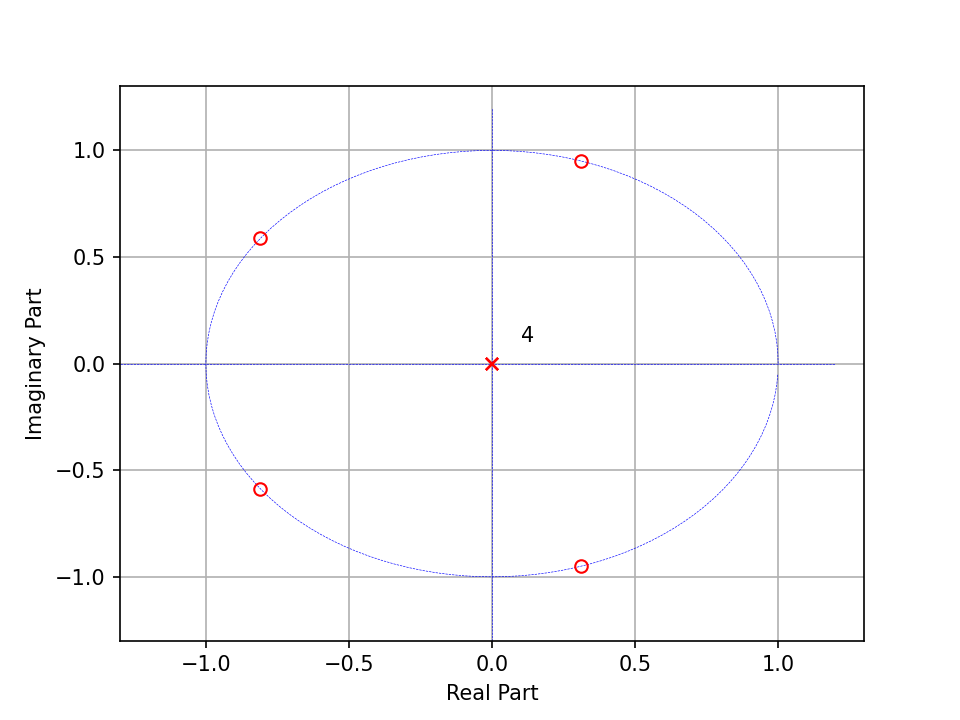

<IPython.core.display.Javascript object>


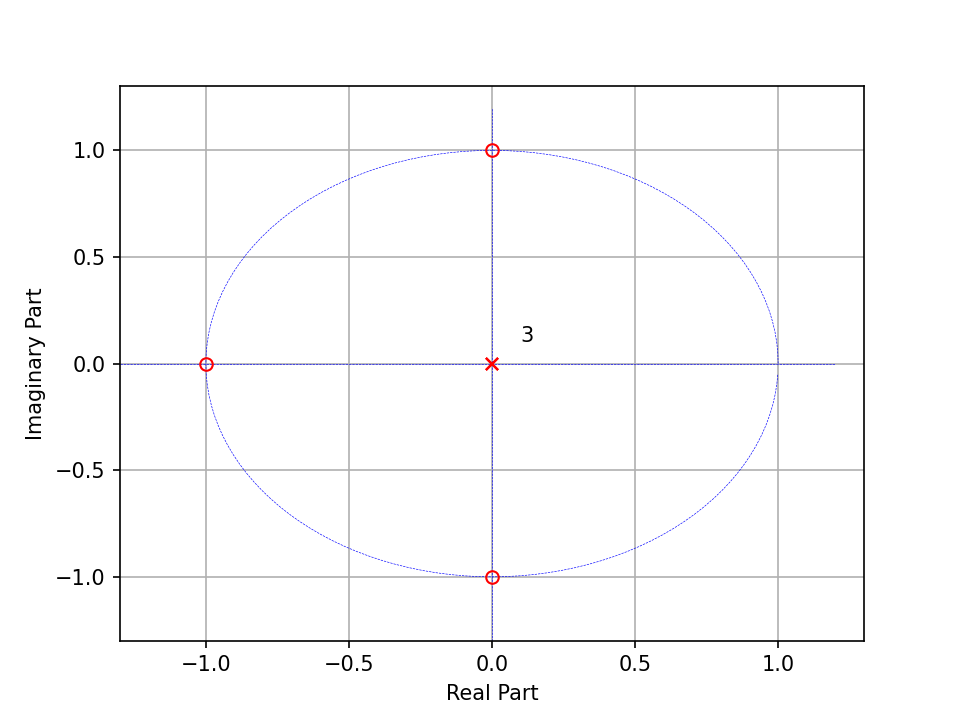

<IPython.core.display.Javascript object>


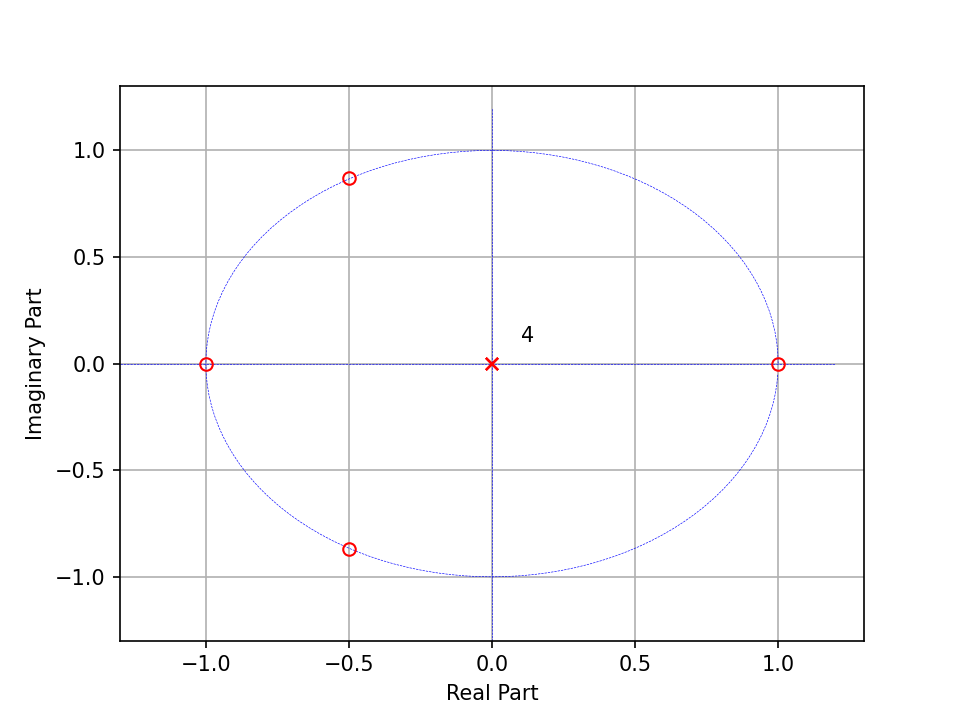

<IPython.core.display.Javascript object>


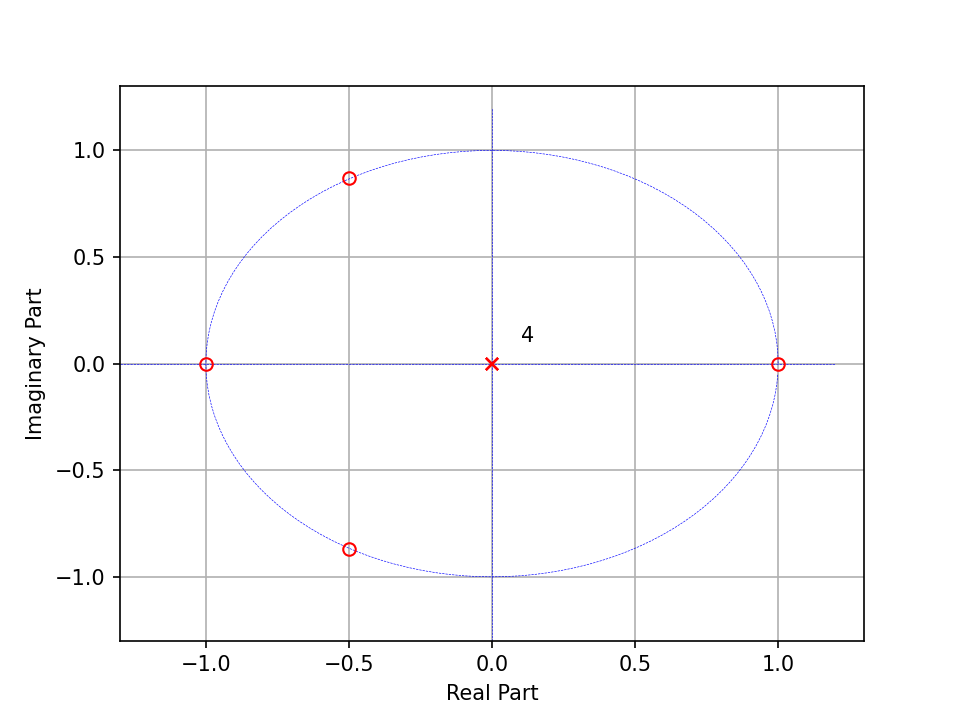

In [21]:
z = np.array([1,1,1,1,1]) #Type-I zeros
p = np.array([1,0,0,0,0]) #Type-I poles
zplane(z,p)

z = np.array([1,1,1,1]) #Type-II zeros
p = np.array([1,0,0,0]) #Type-II poles
zplane(z,p)

z = np.array([1,1,0,-1,-1]) #Type-III zeros
p = np.array([1,0,0,0,0]) #Type-III poles
zplane(z,p)

num = np.array([1,1,-1,-1]) #Type-IV zeros
denum = np.array([1,0,0,0]) #Type-IV poles
zplane(z,p)

<ipython-input-22-aa7c8d643eef>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = bp_filter['ba'].astype(np.float)


<IPython.core.display.Javascript object>


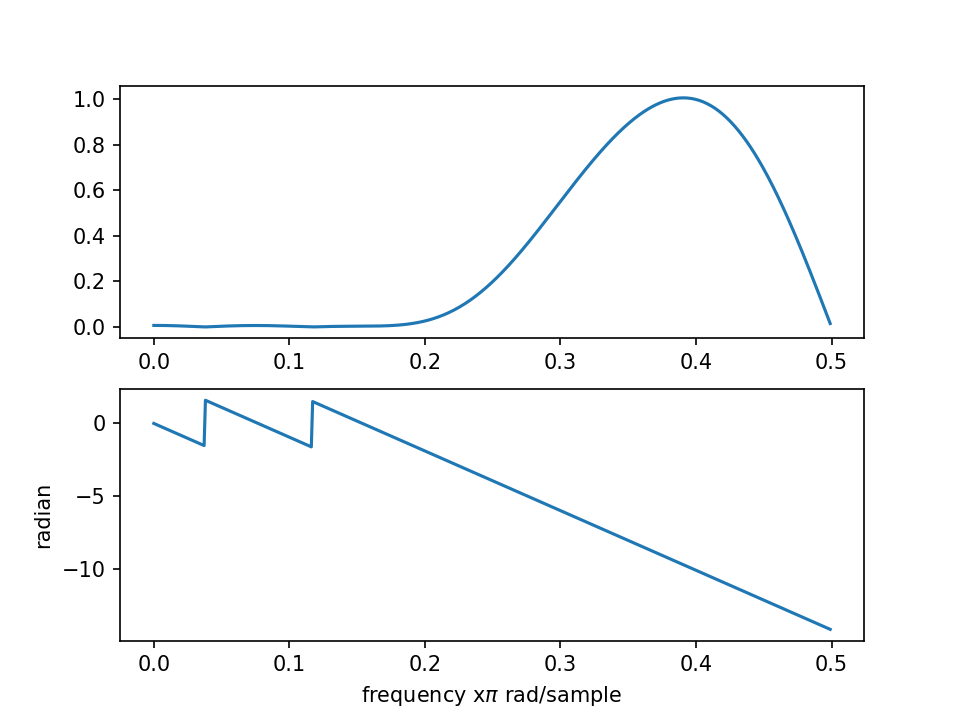

<IPython.core.display.Javascript object>


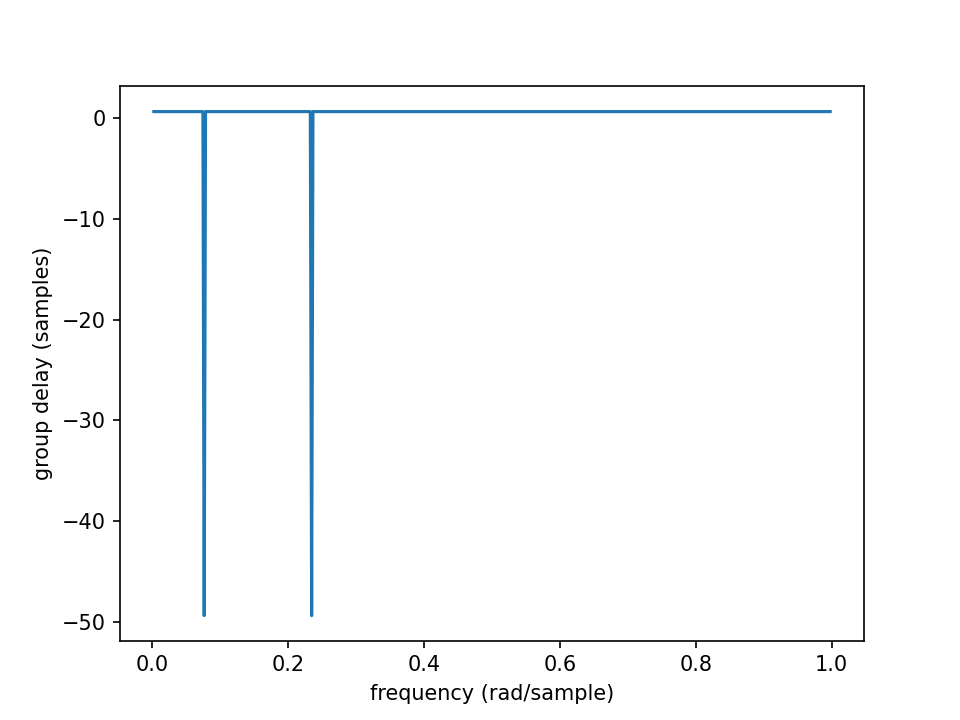

Text(0, 0.5, 'group delay (samples)')

In [22]:
bp_filter = loadmat('bpfilter.mat') 
Coeffs = bp_filter['ba'].astype(np.float) 
b = Coeffs[0,:] 
w, Hw = sgnl.freqz(b)
Hw_mag = np.abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/(2*np.pi), Hw_mag)
ax2.plot(w/(2*np.pi), Hw_phs), plt.ylabel('radian')
plt.xlabel('frequency x$\pi$ rad/sample')

plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')

<ipython-input-23-9f1fed1bde59>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = lp_filter['ba'].astype(np.float)


<IPython.core.display.Javascript object>


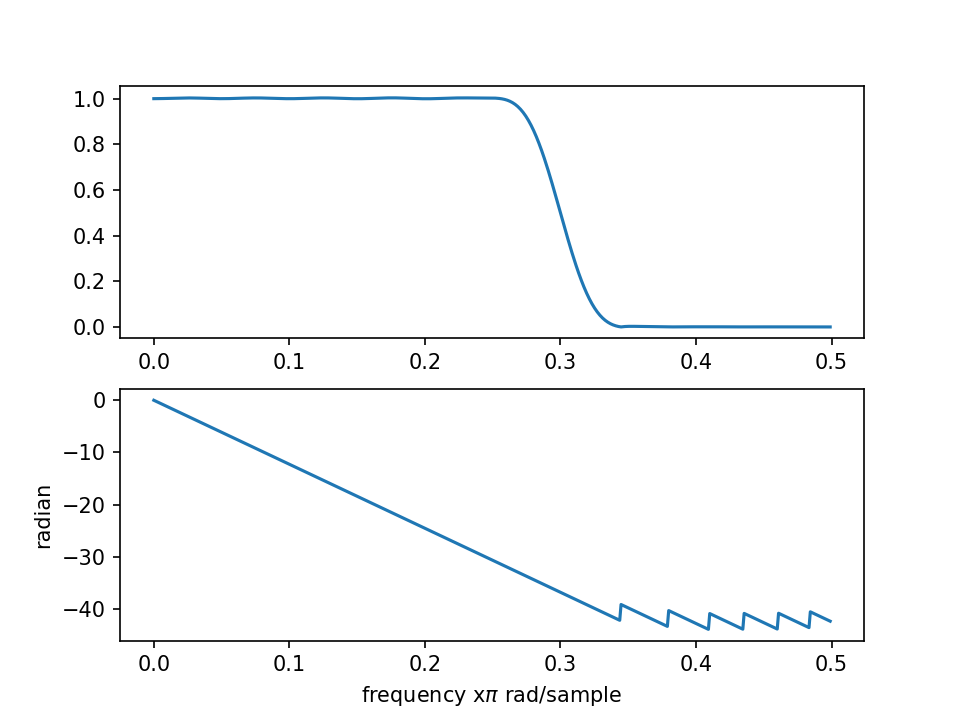

<IPython.core.display.Javascript object>


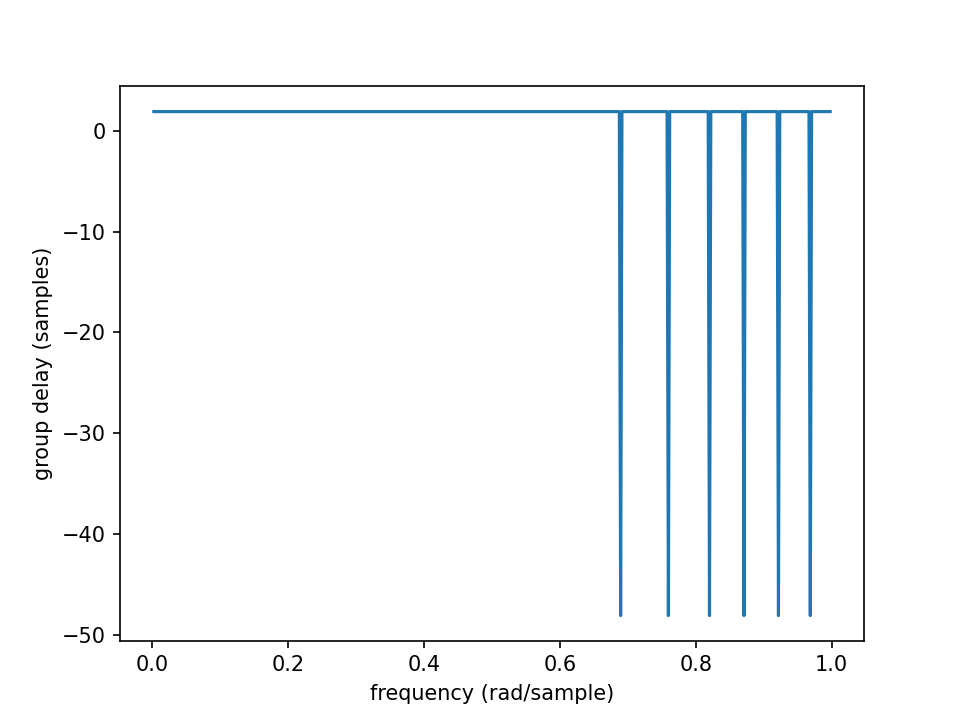

Text(0, 0.5, 'group delay (samples)')

In [23]:
lp_filter = loadmat('lpfilter.mat') 
Coeffs = lp_filter['ba'].astype(np.float) 
b = Coeffs[0,:] 
w, Hw = sgnl.freqz(b)
Hw_mag = np.abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/(2*np.pi), Hw_mag)
ax2.plot(w/(2*np.pi), Hw_phs), plt.ylabel('radian')
plt.xlabel('frequency x$\pi$ rad/sample')

plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')

<ipython-input-24-a0682d44b485>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = hp_filter['ba'].astype(np.float)


<IPython.core.display.Javascript object>


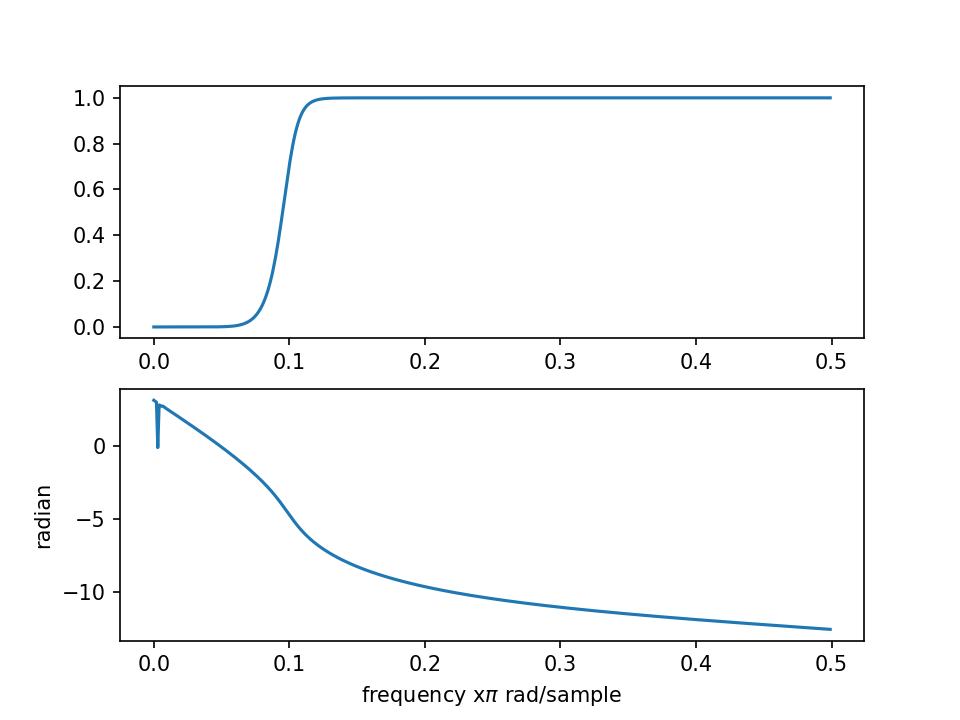

<IPython.core.display.Javascript object>


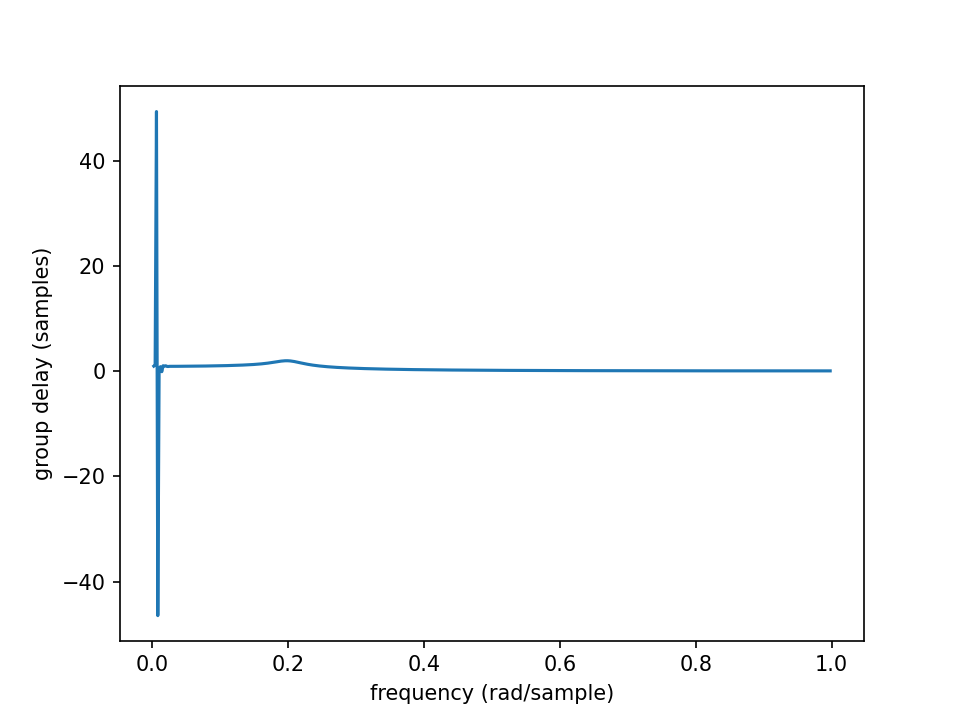

In [24]:
hp_filter = loadmat('hpfilterIIR.mat') 
Coeffs = hp_filter['ba'].astype(np.float) 
b = Coeffs[0,:] 
a = Coeffs[1,:]
w, Hw = sgnl.freqz(b,a)
Hw_mag = np.abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/(2*np.pi), Hw_mag)
ax2.plot(w/(2*np.pi), Hw_phs), plt.ylabel('radian')
plt.xlabel('frequency x$\pi$ rad/sample')

plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')
plt.show()

<ipython-input-25-2f820f3a1731>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = lp_filter['ba'].astype(np.float)


<IPython.core.display.Javascript object>


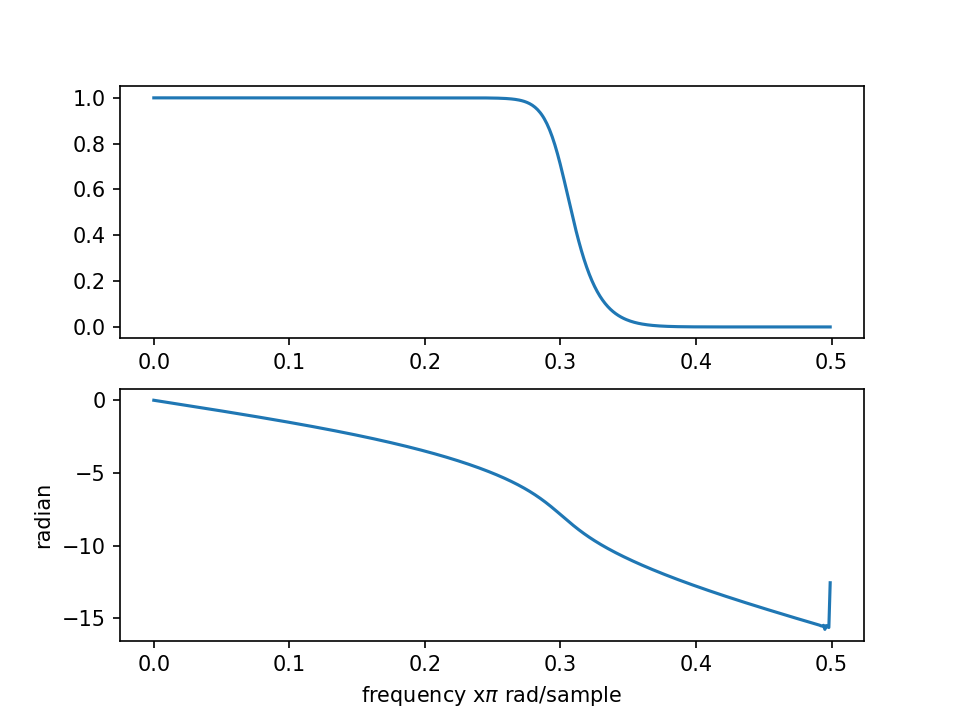

<IPython.core.display.Javascript object>


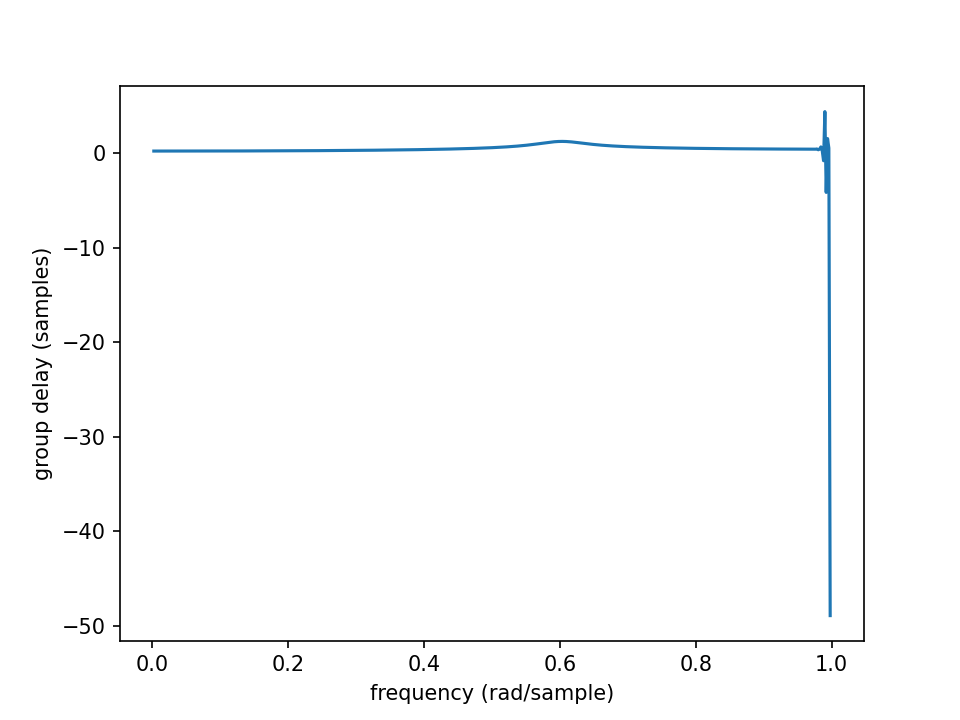

In [25]:
lp_filter = loadmat('lpfilterIIR.mat') 
Coeffs = lp_filter['ba'].astype(np.float) 
b = Coeffs[0,:] 
a = Coeffs[1,:]
w, Hw = sgnl.freqz(b,a)
Hw_mag = np.abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/(2*np.pi), Hw_mag)
ax2.plot(w/(2*np.pi), Hw_phs), plt.ylabel('radian')
plt.xlabel('frequency x$\pi$ rad/sample')

plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')
plt.show()

<IPython.core.display.Javascript object>


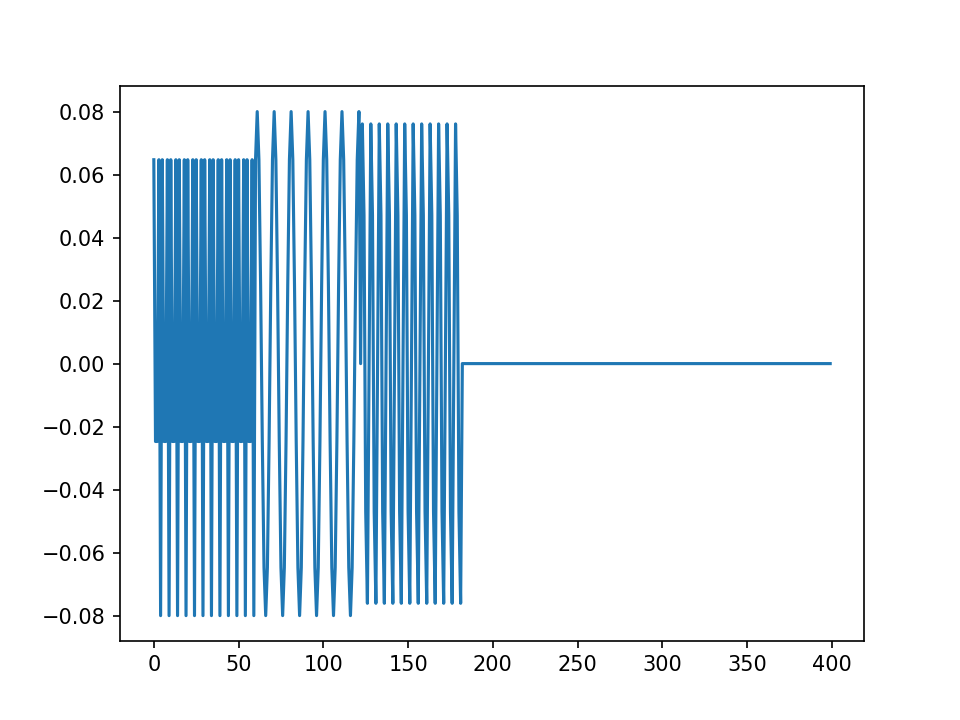

<ipython-input-26-c05510ec3f3b>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = bp_filter['ba'].astype(np.float)


<IPython.core.display.Javascript object>


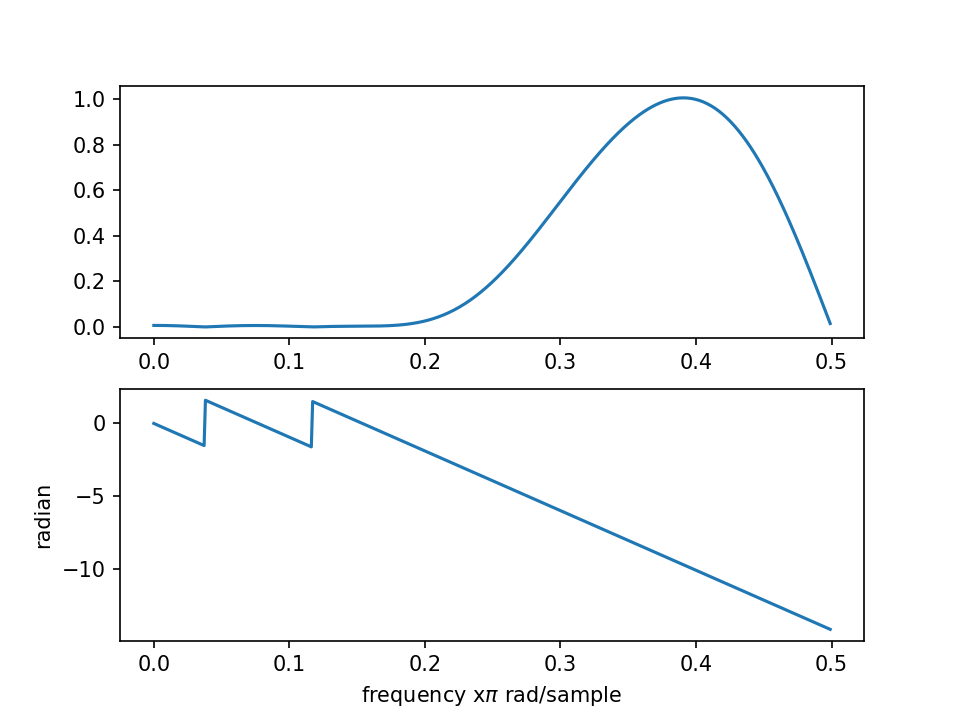

<IPython.core.display.Javascript object>


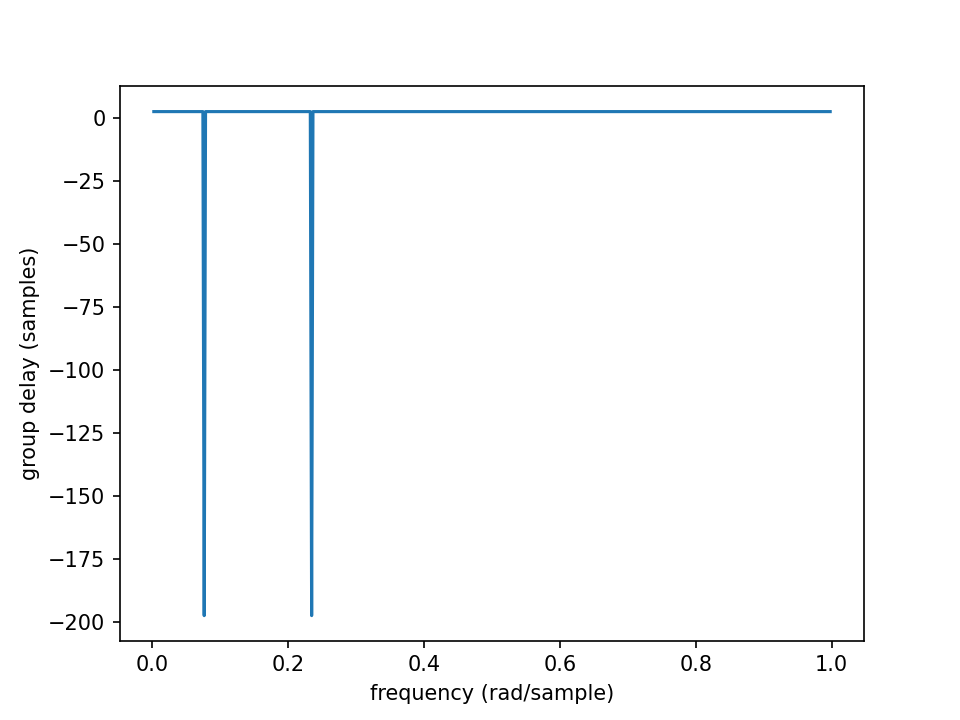

<IPython.core.display.Javascript object>


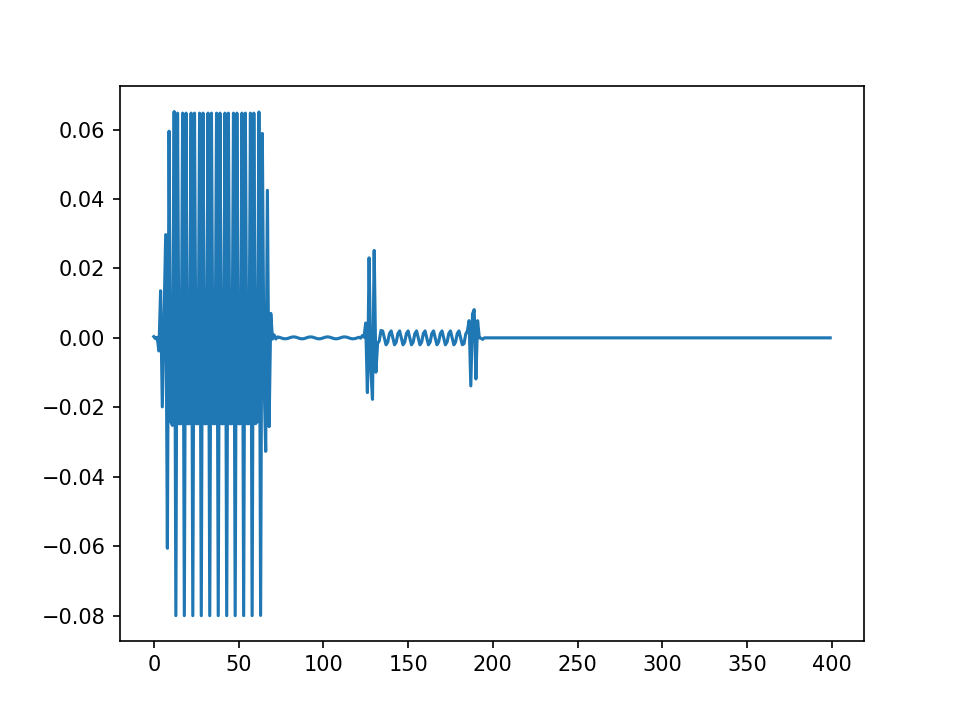

In [26]:
N = 400
M = 60
n = np.arange(0, M+1, 1)
wn = 0.54 - 0.46 * np.cos(2*np.pi*n)
x1 = wn * np.cos(0.2 * np.pi * n)
x2 = wn * np.cos(0.4 * np.pi * n - np.pi/2)
x3 = wn * np.cos(0.8 * np.pi * n - np.pi/5)
xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis = None)
plt.figure()
plt.plot(xn)

w = np.linspace(-np.pi, np.pi, N)
Xw = fft(xn)
Xw_shifted = np.fft.fftshift(Xw)

bp_filter = loadmat('bpfilter.mat') #Band pass FIR
Coeffs = bp_filter['ba'].astype(np.float) 
b = Coeffs[0,:] 
w, Hw = sgnl.freqz(b)
Hw_mag = np.abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/(2*np.pi), Hw_mag)
ax2.plot(w/(2*np.pi), Hw_phs), plt.ylabel('radian')
plt.xlabel('frequency x$\pi$ rad/sample')

plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')


yn = sgnl.lfilter(b, 1,xn) # using the coefficients, we applied the␣ ,→signal to the input of the filter.
plt.figure()
plt.plot(yn)

<ipython-input-27-98575f6e9fa8>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


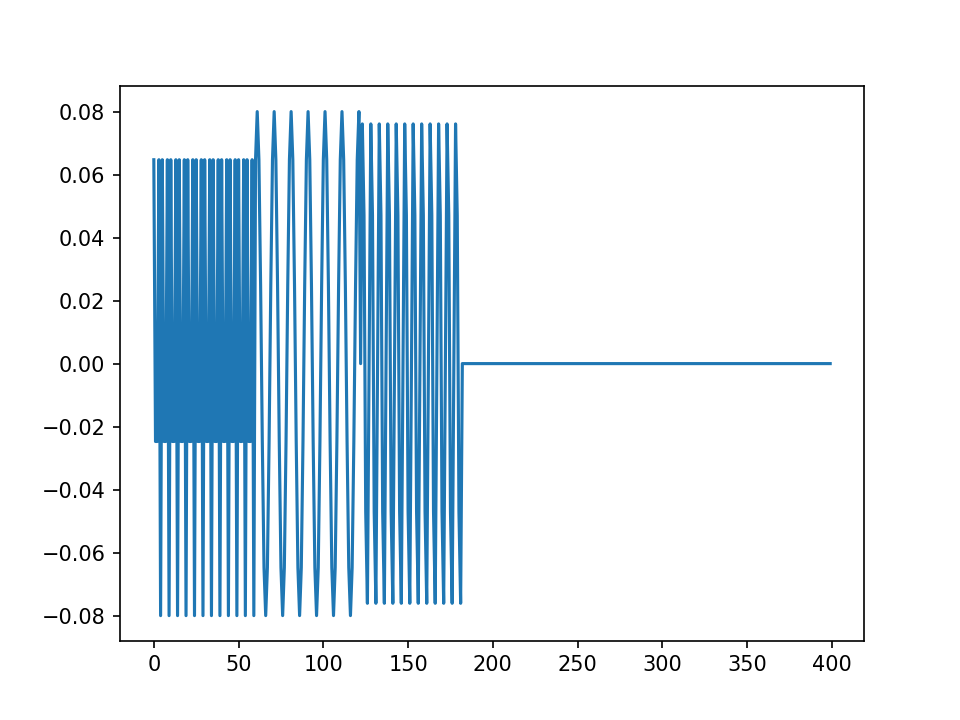

<ipython-input-27-98575f6e9fa8>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = lp_filter['ba'].astype(np.float)


<IPython.core.display.Javascript object>


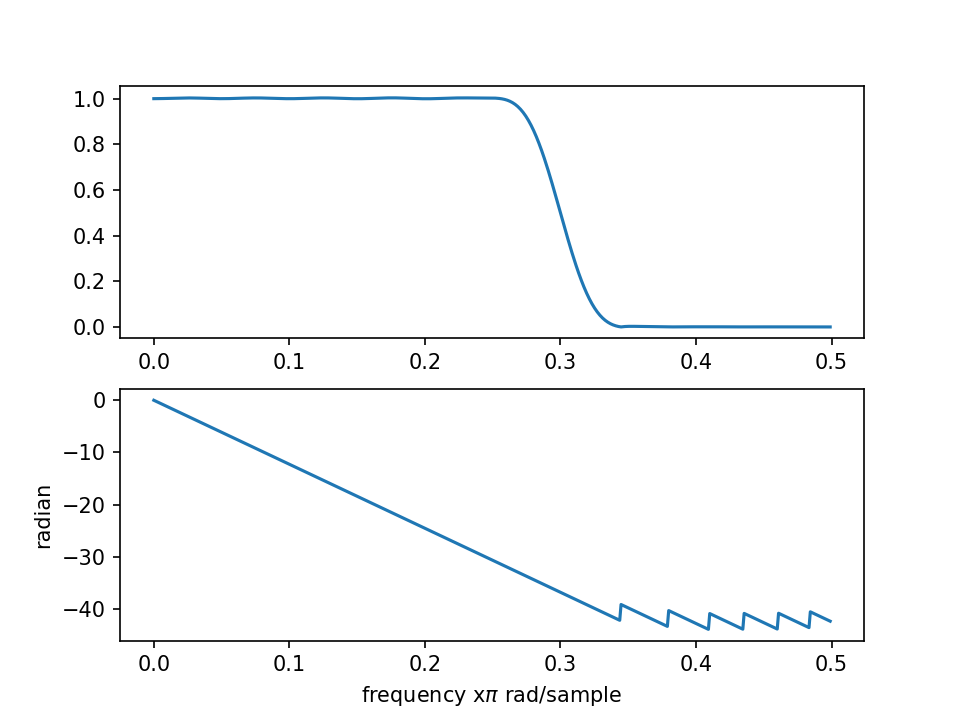

<IPython.core.display.Javascript object>


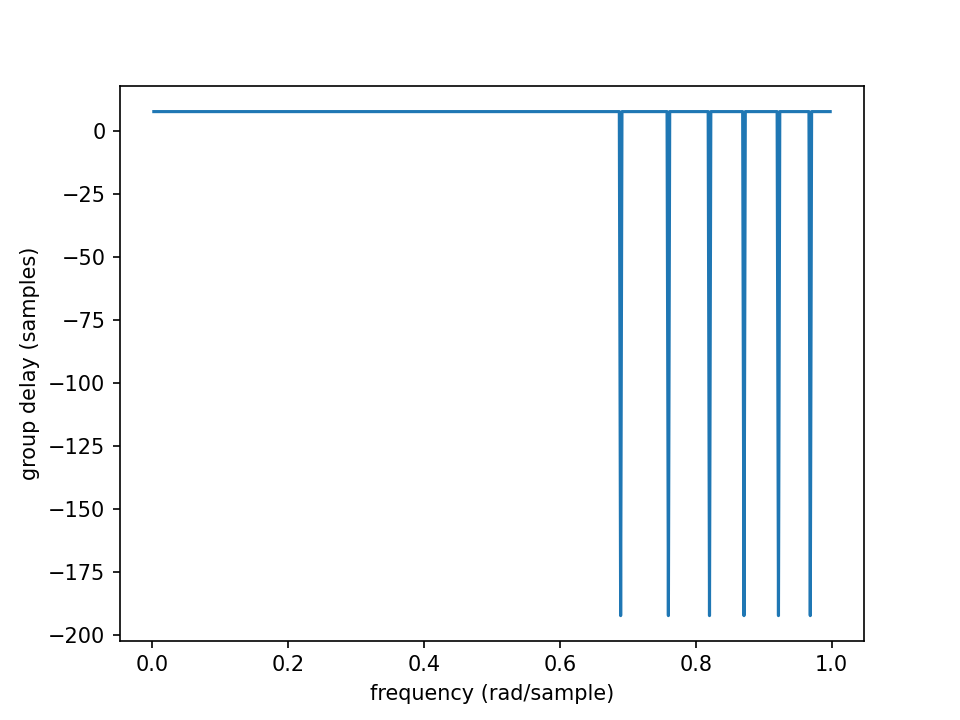

<IPython.core.display.Javascript object>


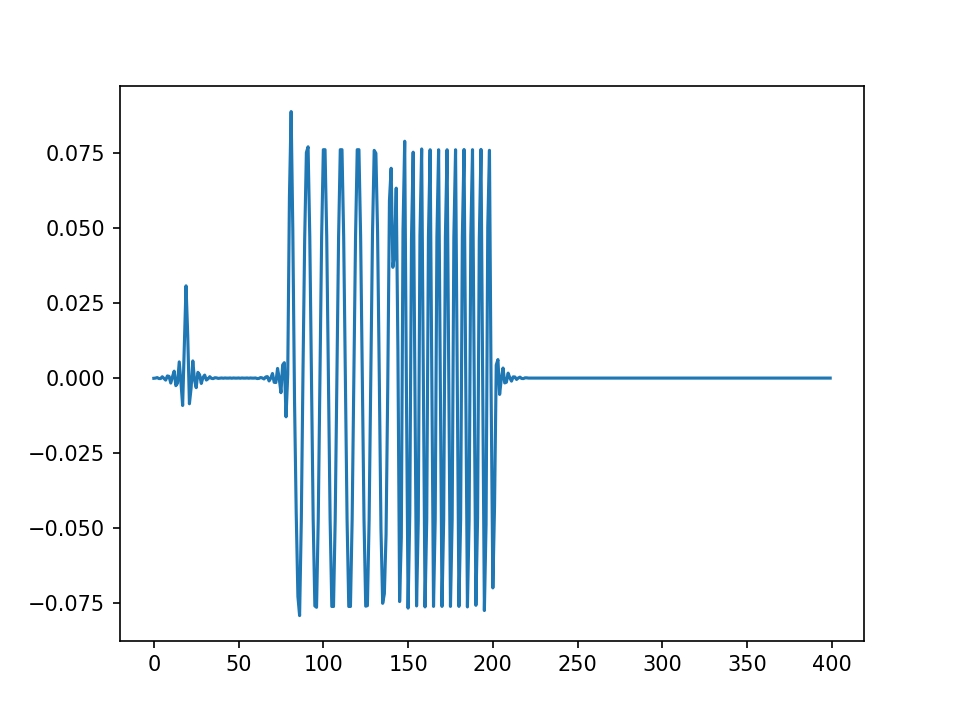

In [27]:
N = 400
M = 60
n = np.arange(0, M+1, 1)
wn = 0.54 - 0.46 * np.cos(2*np.pi*n)
x1 = wn * np.cos(0.2 * np.pi * n)
x2 = wn * np.cos(0.4 * np.pi * n - np.pi/2)
x3 = wn * np.cos(0.8 * np.pi * n - np.pi/5)
xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis = None)
plt.figure()
plt.plot(xn)

w = np.linspace(-np.pi, np.pi, N)
Xw = fft(xn)
Xw_shifted = np.fft.fftshift(Xw)

lp_filter = loadmat('lpfilter.mat') #LPF FIR 
Coeffs = lp_filter['ba'].astype(np.float) 
b = Coeffs[0,:] 
w, Hw = sgnl.freqz(b)
Hw_mag = np.abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/(2*np.pi), Hw_mag)
ax2.plot(w/(2*np.pi), Hw_phs), plt.ylabel('radian')
plt.xlabel('frequency x$\pi$ rad/sample')

plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')

yn = sgnl.lfilter(b, 1,xn) # using the coefficients, we applied the␣ ,→signal to the input of the filter.
plt.figure()
plt.plot(yn)

<IPython.core.display.Javascript object>


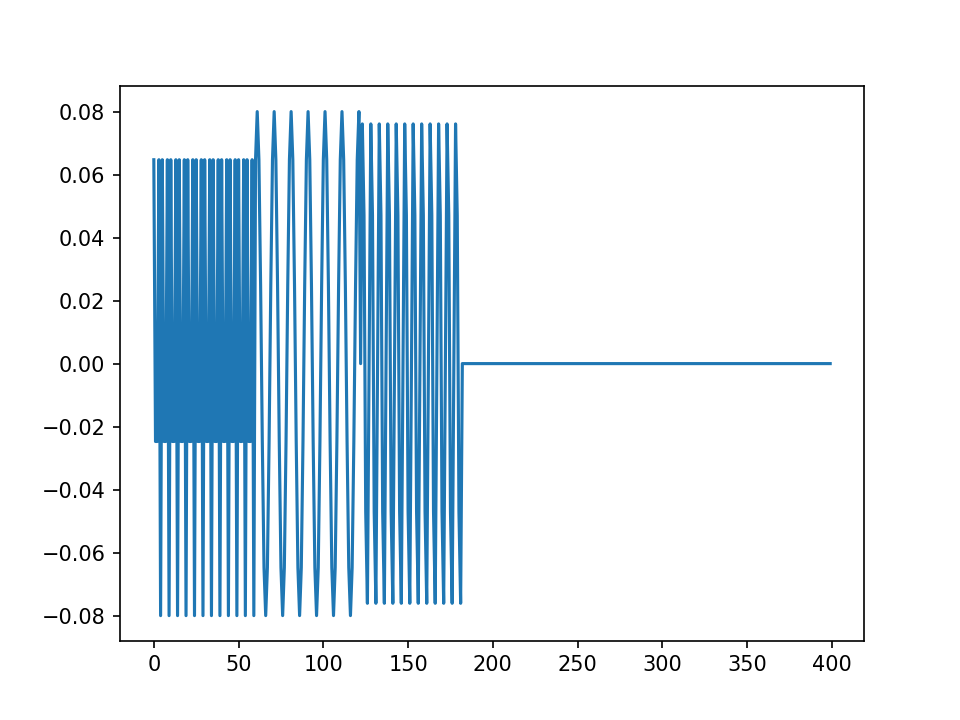

<ipython-input-28-323f7258a432>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = hp_filter['ba'].astype(np.float)


<IPython.core.display.Javascript object>


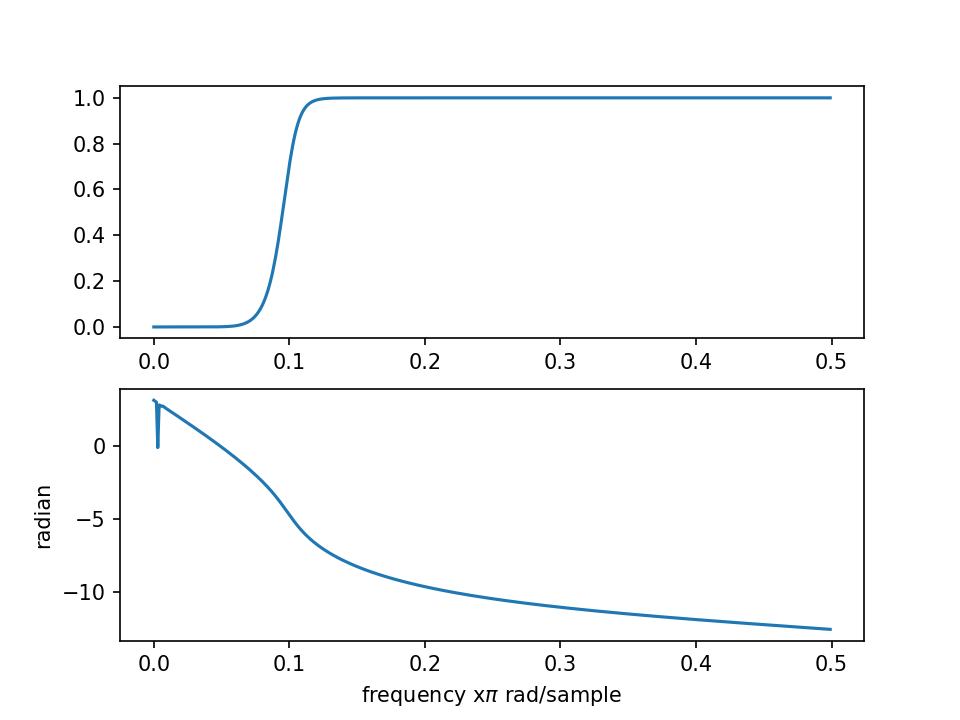

<IPython.core.display.Javascript object>


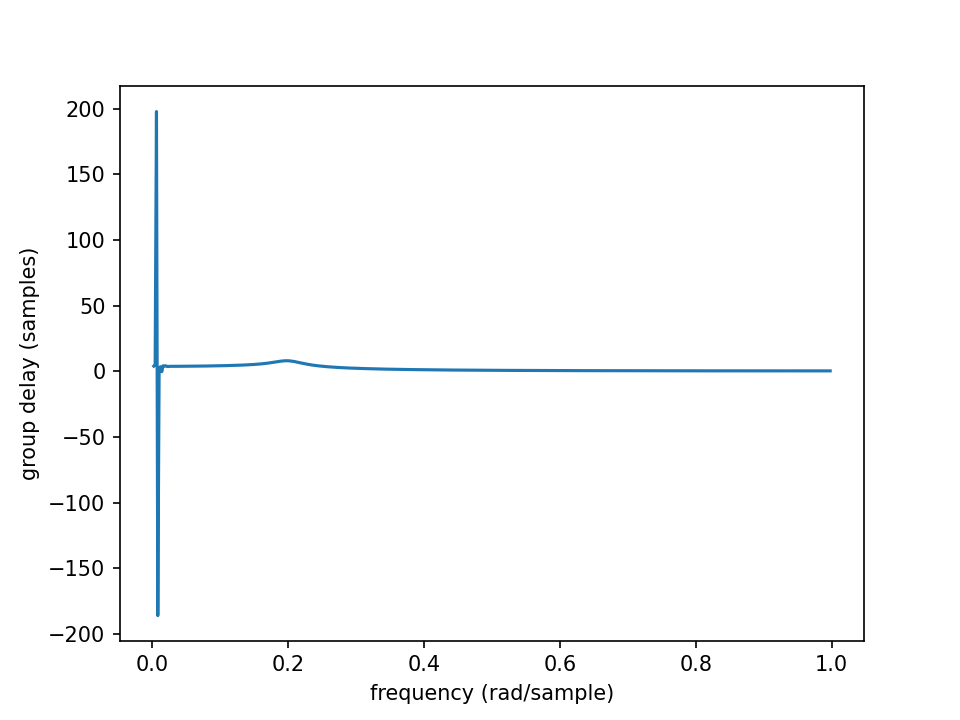

<IPython.core.display.Javascript object>


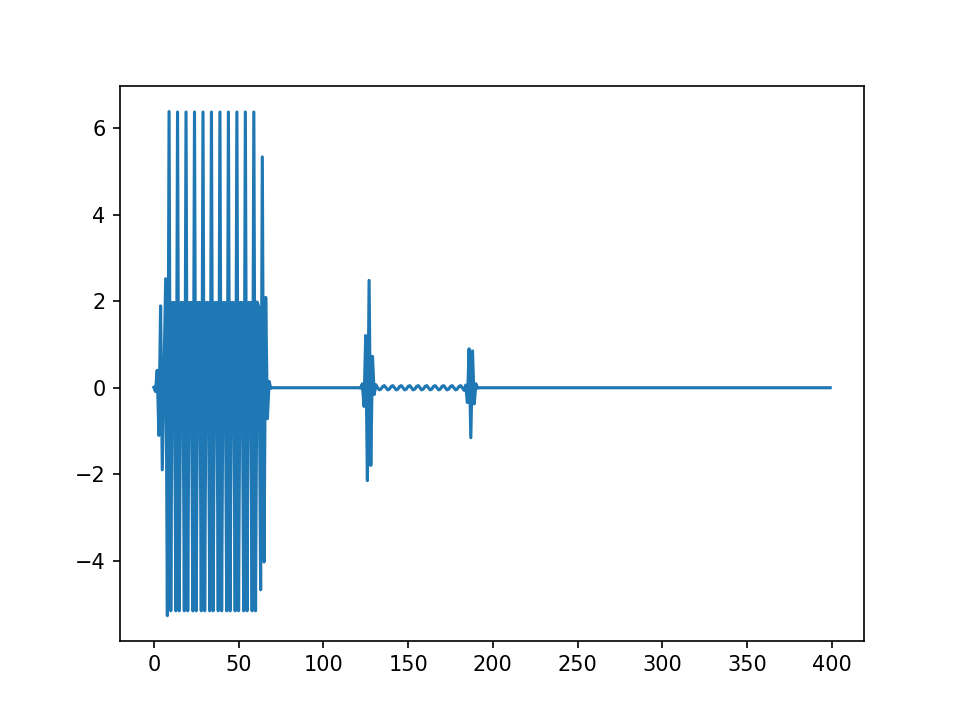

In [28]:
N = 400
M = 60
n = np.arange(0, M+1, 1)
wn = 0.54 - 0.46 * np.cos(2*np.pi*n)
x1 = wn * np.cos(0.2 * np.pi * n)
x2 = wn * np.cos(0.4 * np.pi * n - np.pi/2)
x3 = wn * np.cos(0.8 * np.pi * n - np.pi/5)
xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis = None)
plt.figure()
plt.plot(xn)

w = np.linspace(-np.pi, np.pi, N)
Xw = fft(xn)
Xw_shifted = np.fft.fftshift(Xw)

hp_filter = loadmat('hpfilterIIR.mat') #HPF IIR 
Coeffs = hp_filter['ba'].astype(np.float) 
b = Coeffs[0,:] 
a = Coeffs[1,:]
w, Hw = sgnl.freqz(b,a)
Hw_mag = np.abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/(2*np.pi), Hw_mag)
ax2.plot(w/(2*np.pi), Hw_phs), plt.ylabel('radian')
plt.xlabel('frequency x$\pi$ rad/sample')

plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')
plt.show()


yn = sgnl.lfilter(b, 1,xn) # using the coefficients, we applied the␣ ,→signal to the input of the filter.
plt.figure()
plt.plot(yn)

<IPython.core.display.Javascript object>


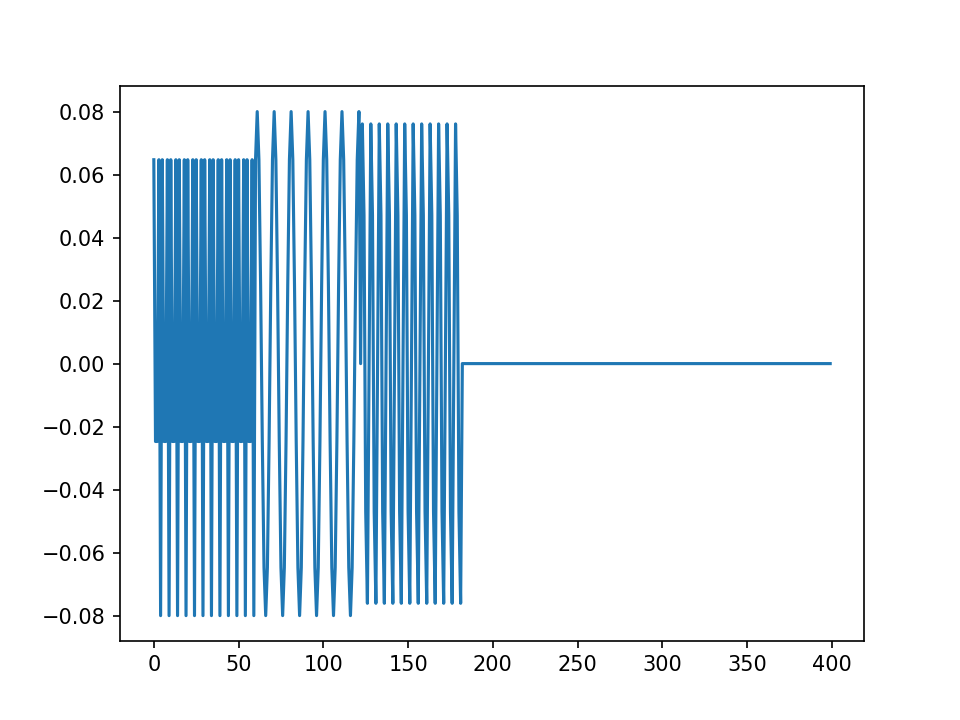

<ipython-input-29-40d6c2c643fd>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = lp_filter['ba'].astype(np.float)


<IPython.core.display.Javascript object>


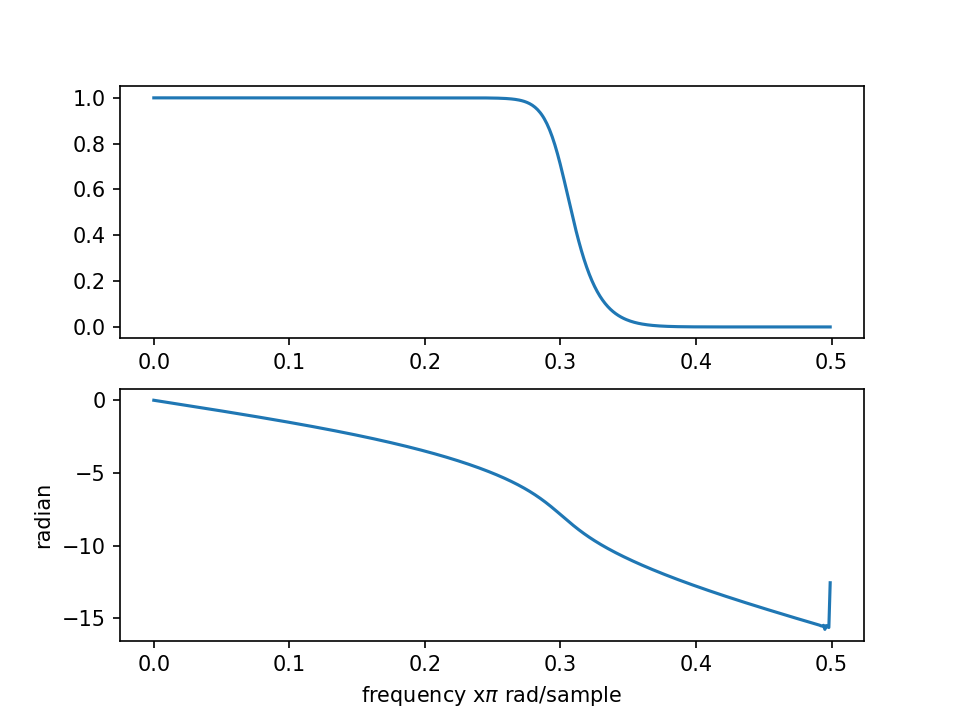

<IPython.core.display.Javascript object>


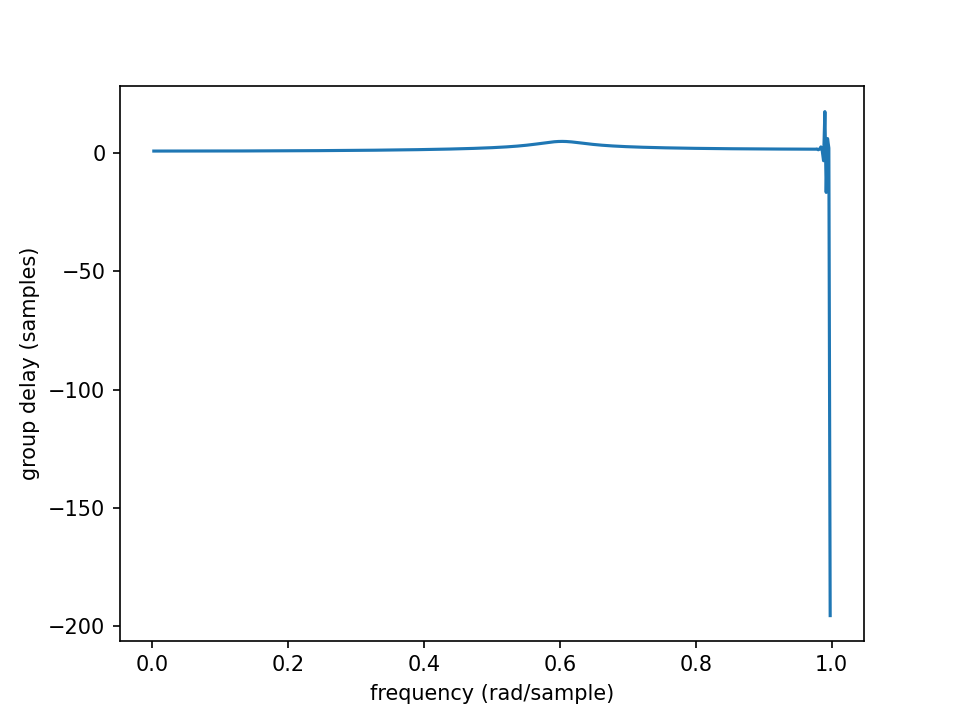

<IPython.core.display.Javascript object>


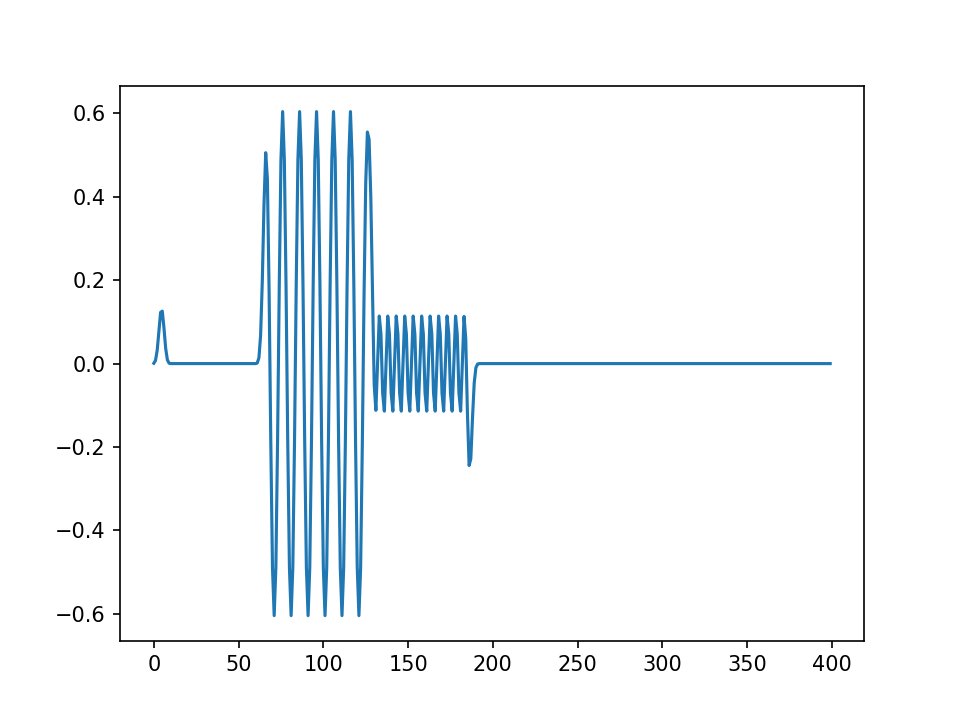

In [29]:
N = 400
M = 60
n = np.arange(0, M+1, 1)
wn = 0.54 - 0.46 * np.cos(2*np.pi*n)
x1 = wn * np.cos(0.2 * np.pi * n)
x2 = wn * np.cos(0.4 * np.pi * n - np.pi/2)
x3 = wn * np.cos(0.8 * np.pi * n - np.pi/5)
xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis = None)
plt.figure()
plt.plot(xn)

w = np.linspace(-np.pi, np.pi, N)
Xw = fft(xn)
Xw_shifted = np.fft.fftshift(Xw)

lp_filter = loadmat('lpfilterIIR.mat') 
Coeffs = lp_filter['ba'].astype(np.float) 
b = Coeffs[0,:] 
a = Coeffs[1,:]
w, Hw = sgnl.freqz(b,a)
Hw_mag = np.abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/(2*np.pi), Hw_mag)
ax2.plot(w/(2*np.pi), Hw_phs), plt.ylabel('radian')
plt.xlabel('frequency x$\pi$ rad/sample')

plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')
plt.show()


yn = sgnl.lfilter(b, 1,xn) # using the coefficients, we applied the␣ ,→signal to the input of the filter.
plt.figure()
plt.plot(yn)